In [1]:
import h5py

# Path to the .mat file
mat_path = r"E:\1 Paper MCT\Cutting Tool Paper\Dataset\cutting tool data\mat files data\AE_ALL.mat"

# Open the .mat file using h5py
with h5py.File(mat_path, 'r') as mat_file:
    print("Top-level keys in the .mat file:")
    for key in mat_file.keys():
        print(f"  - {key}")

    # Let's check the AE_ALL key
    ae_all = mat_file['AE_ALL']

    print("\nSubkeys (Classes) under 'AE_ALL':")
    for key in ae_all.keys():
        print(f"  - {key}")

    # Let's inspect BF, GF, TF, GFI
    selected_classes = ['BF', 'GF', 'TF', 'GFI']
    for cls in selected_classes:
        data_ref = ae_all[cls]
        print(f"\nClass: {cls}")
        print(f"  Shape: {data_ref.shape}")
        print(f"  Data Type: {data_ref.dtype}")
        try:
            print(f"  Sample Data Slice: {data_ref[0,0]}")
        except:
            print(f"  Unable to read sample slice directly from {cls}")


Top-level keys in the .mat file:
  - #refs#
  - AE_ALL

Subkeys (Classes) under 'AE_ALL':
  - BF
  - BFI
  - GF
  - GFI
  - N
  - NI
  - TF

Class: BF
  Shape: (1, 4)
  Data Type: object
  Sample Data Slice: <HDF5 object reference>

Class: GF
  Shape: (1, 4)
  Data Type: object
  Sample Data Slice: <HDF5 object reference>

Class: TF
  Shape: (1, 4)
  Data Type: object
  Sample Data Slice: <HDF5 object reference>

Class: GFI
  Shape: (1, 4)
  Data Type: object
  Sample Data Slice: <HDF5 object reference>


In [2]:
import h5py
import numpy as np

mat_path = r"E:\1 Paper MCT\Cutting Tool Paper\Dataset\cutting tool data\mat files data\AE_ALL.mat"

with h5py.File(mat_path, 'r') as mat_file:
    ae_all = mat_file['AE_ALL']
    selected_classes = ['BF', 'GF', 'TF', 'GFI']

    for cls in selected_classes:
        print(f"\nClass: {cls}")
        data_refs = ae_all[cls][0]  # (1, 4) → accessing 4 channels

        for i, ref in enumerate(data_refs):
            # Dereference the HDF5 object
            channel_data = mat_file[ref]

            # Convert to numpy
            signal_matrix = np.array(channel_data)
            print(f"  Channel {i+1}: shape = {signal_matrix.shape}")



Class: BF
  Channel 1: shape = (1000000, 40)
  Channel 2: shape = (1000000, 40)
  Channel 3: shape = (1000000, 40)
  Channel 4: shape = (1000000, 40)

Class: GF
  Channel 1: shape = (1000000, 40)
  Channel 2: shape = (1000000, 40)
  Channel 3: shape = (1000000, 40)
  Channel 4: shape = (1000000, 40)

Class: TF
  Channel 1: shape = (1000000, 40)
  Channel 2: shape = (1000000, 40)
  Channel 3: shape = (1000000, 40)
  Channel 4: shape = (1000000, 40)

Class: GFI
  Channel 1: shape = (1000000, 40)
  Channel 2: shape = (1000000, 40)
  Channel 3: shape = (1000000, 40)
  Channel 4: shape = (1000000, 40)


In [3]:
import h5py
import numpy as np

# Step 1A: Load and Extract AE Signals (Channel 1 only) from 4 classes
mat_path = r"E:\1 Paper MCT\Cutting Tool Paper\Dataset\cutting tool data\mat files data\AE_ALL.mat"

# Define classes and initialize dictionary
classes_to_use = ['BF', 'GF', 'TF', 'NI']
channel_index = 0  # Channel 1 (index starts at 0)
signals_dict = {}

# Open and extract signals
with h5py.File(mat_path, 'r') as mat_file:
    ae_all = mat_file['AE_ALL']

    for cls in classes_to_use:
        print(f"\nExtracting from class: {cls}")
        # Dereference channel 1 data
        data_ref = ae_all[cls][0][channel_index]
        channel_data = np.array(mat_file[data_ref])  # Shape: (1000000, 40)
        
        signals = [channel_data[:, i] for i in range(channel_data.shape[1])]
        signals_dict[cls] = signals
        print(f"  → Extracted {len(signals)} signals of length {signals[0].shape[0]}")

# Summary
total_signals = sum(len(sigs) for sigs in signals_dict.values())
print(f"\n✅ Total signals extracted: {total_signals}")



Extracting from class: BF
  → Extracted 40 signals of length 1000000

Extracting from class: GF
  → Extracted 40 signals of length 1000000

Extracting from class: TF
  → Extracted 40 signals of length 1000000

Extracting from class: NI
  → Extracted 40 signals of length 1000000

✅ Total signals extracted: 160


In [4]:
from scipy.signal import welch

# Step 1B: Frame-based burst detection
def segment_signal(signal, frame_size=2000, hop_size=1000):
    frames = []
    for start in range(0, len(signal) - frame_size + 1, hop_size):
        frame = signal[start:start + frame_size]
        frames.append(frame)
    return np.array(frames)

def detect_burst_frames(frames, top_percent=10):
    # Compute RMS energy per frame
    energies = np.sqrt(np.mean(frames**2, axis=1))
    threshold = np.percentile(energies, 100 - top_percent)
    burst_indices = np.where(energies >= threshold)[0]
    return frames[burst_indices], burst_indices

# Segment and extract burst frames for each signal in each class
burst_segments = {}  # Store segmented burst frames

for cls, signals in signals_dict.items():
    print(f"\nProcessing class: {cls}")
    class_bursts = []

    for idx, signal in enumerate(signals):
        frames = segment_signal(signal)
        bursts, _ = detect_burst_frames(frames)
        class_bursts.append(bursts)
        print(f"  Signal {idx+1}: extracted {bursts.shape[0]} burst frames")

    burst_segments[cls] = class_bursts

print("\n✅ Burst-informed segmentation complete.")



Processing class: BF
  Signal 1: extracted 100 burst frames
  Signal 2: extracted 100 burst frames
  Signal 3: extracted 100 burst frames
  Signal 4: extracted 100 burst frames
  Signal 5: extracted 100 burst frames
  Signal 6: extracted 100 burst frames
  Signal 7: extracted 100 burst frames
  Signal 8: extracted 100 burst frames
  Signal 9: extracted 100 burst frames
  Signal 10: extracted 100 burst frames
  Signal 11: extracted 100 burst frames
  Signal 12: extracted 100 burst frames
  Signal 13: extracted 100 burst frames
  Signal 14: extracted 100 burst frames
  Signal 15: extracted 100 burst frames
  Signal 16: extracted 100 burst frames
  Signal 17: extracted 100 burst frames
  Signal 18: extracted 100 burst frames
  Signal 19: extracted 100 burst frames
  Signal 20: extracted 100 burst frames
  Signal 21: extracted 100 burst frames
  Signal 22: extracted 100 burst frames
  Signal 23: extracted 100 burst frames
  Signal 24: extracted 100 burst frames
  Signal 25: extracted 100 

In [5]:
import pywt

# Step 1C: Adaptive Wavelet Denoising for one burst frame
def wavelet_denoise(frame, wavelet='db4', level=4):
    coeffs = pywt.wavedec(frame, wavelet, level=level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(frame)))
    
    denoised_coeffs = [coeffs[0]] + [pywt.threshold(c, value=uthresh, mode='soft') for c in coeffs[1:]]
    reconstructed = pywt.waverec(denoised_coeffs, wavelet)
    
    return reconstructed[:len(frame)]  # Ensure same length

# Denoise all burst frames for each signal in each class
denoised_segments = {}

for cls, class_bursts in burst_segments.items():
    print(f"\nDenoising class: {cls}")
    class_denoised = []

    for signal_idx, bursts in enumerate(class_bursts):
        denoised_frames = np.array([wavelet_denoise(frame) for frame in bursts])
        class_denoised.append(denoised_frames)
        print(f"  Signal {signal_idx+1}: denoised {denoised_frames.shape[0]} frames")

    denoised_segments[cls] = class_denoised

print("\n✅ Adaptive wavelet denoising complete.")



Denoising class: BF
  Signal 1: denoised 100 frames
  Signal 2: denoised 100 frames
  Signal 3: denoised 100 frames
  Signal 4: denoised 100 frames
  Signal 5: denoised 100 frames
  Signal 6: denoised 100 frames
  Signal 7: denoised 100 frames
  Signal 8: denoised 100 frames
  Signal 9: denoised 100 frames
  Signal 10: denoised 100 frames
  Signal 11: denoised 100 frames
  Signal 12: denoised 100 frames
  Signal 13: denoised 100 frames
  Signal 14: denoised 100 frames
  Signal 15: denoised 100 frames
  Signal 16: denoised 100 frames
  Signal 17: denoised 100 frames
  Signal 18: denoised 100 frames
  Signal 19: denoised 100 frames
  Signal 20: denoised 100 frames
  Signal 21: denoised 100 frames
  Signal 22: denoised 100 frames
  Signal 23: denoised 100 frames
  Signal 24: denoised 100 frames
  Signal 25: denoised 100 frames
  Signal 26: denoised 100 frames
  Signal 27: denoised 100 frames
  Signal 28: denoised 100 frames
  Signal 29: denoised 100 frames
  Signal 30: denoised 100 frame

In [7]:
from scipy.stats import skew, kurtosis

# Step 2A: Time-Domain Features for one frame
def extract_td_features(frame):
    mean_val = np.mean(frame)
    rms_val = np.sqrt(np.mean(frame**2))
    var_val = np.var(frame)
    peak_val = np.max(np.abs(frame))
    skew_val = skew(frame)
    kurt_val = kurtosis(frame)
    crest_factor = peak_val / rms_val if rms_val != 0 else 0

    return [mean_val, rms_val, var_val, peak_val, skew_val, kurt_val, crest_factor]

# Extract TD features for all denoised burst frames
td_features_all = []
labels_all = []

class_label_map = {'BF': 0, 'GF': 1, 'TF': 2, 'NI': 3}

for cls, class_denoised in denoised_segments.items():
    print(f"\nExtracting TD features for class: {cls}")
    label = class_label_map[cls]

    for signal_frames in class_denoised:
        for frame in signal_frames:
            features = extract_td_features(frame)
            td_features_all.append(features)
            labels_all.append(label)

td_features_all = np.array(td_features_all)
labels_all = np.array(labels_all)

print(f"\n✅ TD Feature Extraction Complete: {td_features_all.shape[0]} samples × {td_features_all.shape[1]} features")



Extracting TD features for class: BF

Extracting TD features for class: GF

Extracting TD features for class: TF

Extracting TD features for class: NI

✅ TD Feature Extraction Complete: 16000 samples × 7 features


In [8]:
from scipy.signal import welch

# Step 2B: Frequency-Domain Features using Welch's method
def extract_fd_features(frame, fs=1_000_000):
    freqs, psd = welch(frame, fs=fs, nperseg=512)
    psd_sum = np.sum(psd)

    # Spectral Centroid
    centroid = np.sum(freqs * psd) / psd_sum

    # Spectral Bandwidth
    bandwidth = np.sqrt(np.sum(((freqs - centroid) ** 2) * psd) / psd_sum)

    # Spectral Roll-off (85%)
    rolloff_threshold = 0.85 * psd_sum
    cumulative_energy = np.cumsum(psd)
    rolloff = freqs[np.where(cumulative_energy >= rolloff_threshold)[0][0]]

    # Mean Frequency
    mean_freq = np.mean(freqs)

    return [centroid, bandwidth, rolloff, mean_freq]

# Extract FD features
fd_features_all = []

for cls, class_denoised in denoised_segments.items():
    print(f"\nExtracting FD features for class: {cls}")

    for signal_frames in class_denoised:
        for frame in signal_frames:
            features = extract_fd_features(frame)
            fd_features_all.append(features)

fd_features_all = np.array(fd_features_all)
print(f"\n✅ FD Feature Extraction Complete: {fd_features_all.shape[0]} samples × {fd_features_all.shape[1]} features")



Extracting FD features for class: BF

Extracting FD features for class: GF

Extracting FD features for class: TF

Extracting FD features for class: NI

✅ FD Feature Extraction Complete: 16000 samples × 4 features


In [9]:
from scipy.signal import stft
from scipy.stats import entropy

# Step 2C: Time-Frequency Features using STFT
def extract_stft_features(frame, fs=1_000_000):
    f, t, Zxx = stft(frame, fs=fs, nperseg=256, noverlap=128)
    magnitude = np.abs(Zxx)
    energy = magnitude**2

    # Flatten the energy for statistics
    energy_flat = energy.flatten()
    total_energy = np.sum(energy_flat)

    mean_energy = np.mean(energy_flat)
    max_energy = np.max(energy_flat)
    std_energy = np.std(energy_flat)

    # Normalize and compute spectral entropy
    prob_energy = energy_flat / total_energy if total_energy != 0 else np.ones_like(energy_flat) / len(energy_flat)
    spectral_entropy = entropy(prob_energy)

    return [mean_energy, max_energy, std_energy, spectral_entropy]

# Extract STFT features
stft_features_all = []

for cls, class_denoised in denoised_segments.items():
    print(f"\nExtracting STFT features for class: {cls}")

    for signal_frames in class_denoised:
        for frame in signal_frames:
            features = extract_stft_features(frame)
            stft_features_all.append(features)

stft_features_all = np.array(stft_features_all)
print(f"\n✅ STFT Feature Extraction Complete: {stft_features_all.shape[0]} samples × {stft_features_all.shape[1]} features")



Extracting STFT features for class: BF

Extracting STFT features for class: GF

Extracting STFT features for class: TF

Extracting STFT features for class: NI

✅ STFT Feature Extraction Complete: 16000 samples × 4 features


In [10]:
def extract_hos_burst_features(frame, fs=1_000_000):
    # HOS
    mean = np.mean(frame)
    centered = frame - mean
    m3 = np.mean(centered ** 3)
    m4 = np.mean(centered ** 4)
    m5 = np.mean(centered ** 5)
    root_mean_cube = np.cbrt(np.mean(np.abs(frame) ** 3))

    # Burst Features
    peak_amp = np.max(np.abs(frame))
    energy = np.sum(frame ** 2)

    # Zero Crossing Rate
    zcr = ((frame[:-1] * frame[1:]) < 0).sum() / len(frame)

    # Rise Time: from 10% to 90% of peak
    abs_frame = np.abs(frame)
    peak_idx = np.argmax(abs_frame)
    ten_percent = 0.1 * abs_frame[peak_idx]
    ninety_percent = 0.9 * abs_frame[peak_idx]

    indices = np.where((abs_frame >= ten_percent) & (abs_frame <= ninety_percent))[0]
    rise_time = (indices[-1] - indices[0]) / fs if len(indices) > 1 else 0

    return [m3, m4, m5, root_mean_cube, peak_amp, energy, zcr, rise_time]

# Extract all HOS + Burst features
hos_burst_features_all = []

for cls, class_denoised in denoised_segments.items():
    print(f"\nExtracting HOS + Burst features for class: {cls}")

    for signal_frames in class_denoised:
        for frame in signal_frames:
            features = extract_hos_burst_features(frame)
            hos_burst_features_all.append(features)

hos_burst_features_all = np.array(hos_burst_features_all)
print(f"\n✅ HOS + Burst Feature Extraction Complete: {hos_burst_features_all.shape[0]} samples × {hos_burst_features_all.shape[1]} features")



Extracting HOS + Burst features for class: BF

Extracting HOS + Burst features for class: GF

Extracting HOS + Burst features for class: TF

Extracting HOS + Burst features for class: NI

✅ HOS + Burst Feature Extraction Complete: 16000 samples × 8 features


In [11]:
# Step 3A: Concatenate all feature sets
from sklearn.utils import shuffle

# Stack all features horizontally
full_features = np.hstack([td_features_all, fd_features_all, stft_features_all, hos_burst_features_all])
full_labels = labels_all  # Already aligned

# Shuffle for randomness
full_features, full_labels = shuffle(full_features, full_labels, random_state=42)

print(f"✅ Combined Feature Matrix Shape: {full_features.shape}")
print(f"✅ Corresponding Labels Shape: {full_labels.shape}")


✅ Combined Feature Matrix Shape: (16000, 23)
✅ Corresponding Labels Shape: (16000,)



✅ Stacked Ensemble Test Accuracy: 87.47%
              precision    recall  f1-score   support

          BF       0.95      0.97      0.96       800
          GF       0.94      0.90      0.92       800
          TF       0.79      0.86      0.82       800
         GFI       0.82      0.77      0.80       800

    accuracy                           0.87      3200
   macro avg       0.88      0.87      0.87      3200
weighted avg       0.88      0.87      0.87      3200



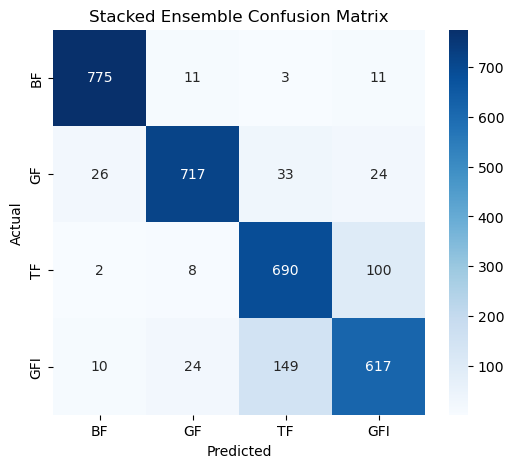

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 4C: Use full features (no VAE)
X = full_features
y = full_labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define base learners
base_learners = [
    ('xgb', XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='mlogloss')),
    ('svm', SVC(kernel='rbf', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# Meta-learner
meta_learner = LogisticRegression(max_iter=1000)

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacked_model.fit(X_train, y_train)

# Predict & evaluate
y_pred = stacked_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Stacked Ensemble Test Accuracy: {acc * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=['BF', 'GF', 'TF', 'GFI']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BF', 'GF', 'TF', 'GFI'], yticklabels=['BF', 'GF', 'TF', 'GFI'])
plt.title("Stacked Ensemble Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Prepare input X and label y
X_cnn = []
y_cnn = []

class_label_map = {'BF': 0, 'GF': 1, 'TF': 2, 'NI': 3}

for cls, class_denoised in denoised_segments.items():
    label = class_label_map[cls]
    for signal_frames in class_denoised:
        for frame in signal_frames:
            X_cnn.append(frame)
            y_cnn.append(label)

X_cnn = np.array(X_cnn)          # Shape: (16000, 2000)
y_cnn = np.array(y_cnn)          # Shape: (16000,)
y_cnn_cat = to_categorical(y_cnn, num_classes=4)  # One-hot labels

# Reshape input for 1D CNN [samples, time_steps, 1]
X_cnn = X_cnn.reshape(-1, 2000, 1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn_cat, test_size=0.2, stratify=y_cnn, random_state=42)

print("✅ CNN Input Shape:", X_train.shape)
print("✅ CNN Labels Shape:", y_train.shape)


✅ CNN Input Shape: (12800, 2000, 1)
✅ CNN Labels Shape: (12800, 4)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 5B: Define 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=7, activation='relu', input_shape=(2000, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 29s 157ms/step - accuracy: 0.6219 - loss: 1.9042 - val_accuracy: 0.2543 - val_loss: 43.2160
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 0.7492 - loss: 0.5514 - val_accuracy: 0.2551 - val_loss: 44.0224
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.7964 - loss: 0.4501 - val_accuracy: 0.3340 - val_loss: 31.7329
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 29s 180ms/step - accuracy: 0.8183 - loss: 0.3815 - val_accuracy: 0.6164 - val_loss: 1.9219
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 0.8356 - loss: 0.3609 - val_accuracy: 0.8250 - val_loss: 0.4166
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 154ms/step - accuracy: 0.8629 - loss: 0.3168 - val_accuracy: 0.8262 - val_loss: 0.4658
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 154ms/step - accuracy: 0.8711 - loss: 0.2833 - val_accuracy: 0.8234 - val_loss: 0.4981
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 0.8875 - loss


✅ Test Accuracy: 82.69%
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Classification Report:
              precision    recall  f1-score   support

          BF       0.95      0.95      0.95       800
          GF       0.88      0.91      0.90       800
          TF       0.77      0.71      0.74       800
         GFI       0.71      0.73      0.72       800

    accuracy                           0.83      3200
   macro avg       0.83      0.83      0.83      3200
weighted avg       0.83      0.83      0.83      3200



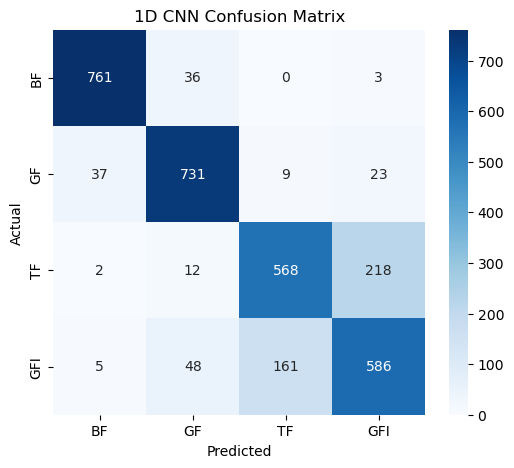

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# Predict and decode
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=['BF', 'GF', 'TF', 'GFI']))

# Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BF', 'GF', 'TF', 'GFI'], yticklabels=['BF', 'GF', 'TF', 'GFI'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("1D CNN Confusion Matrix")
plt.show()


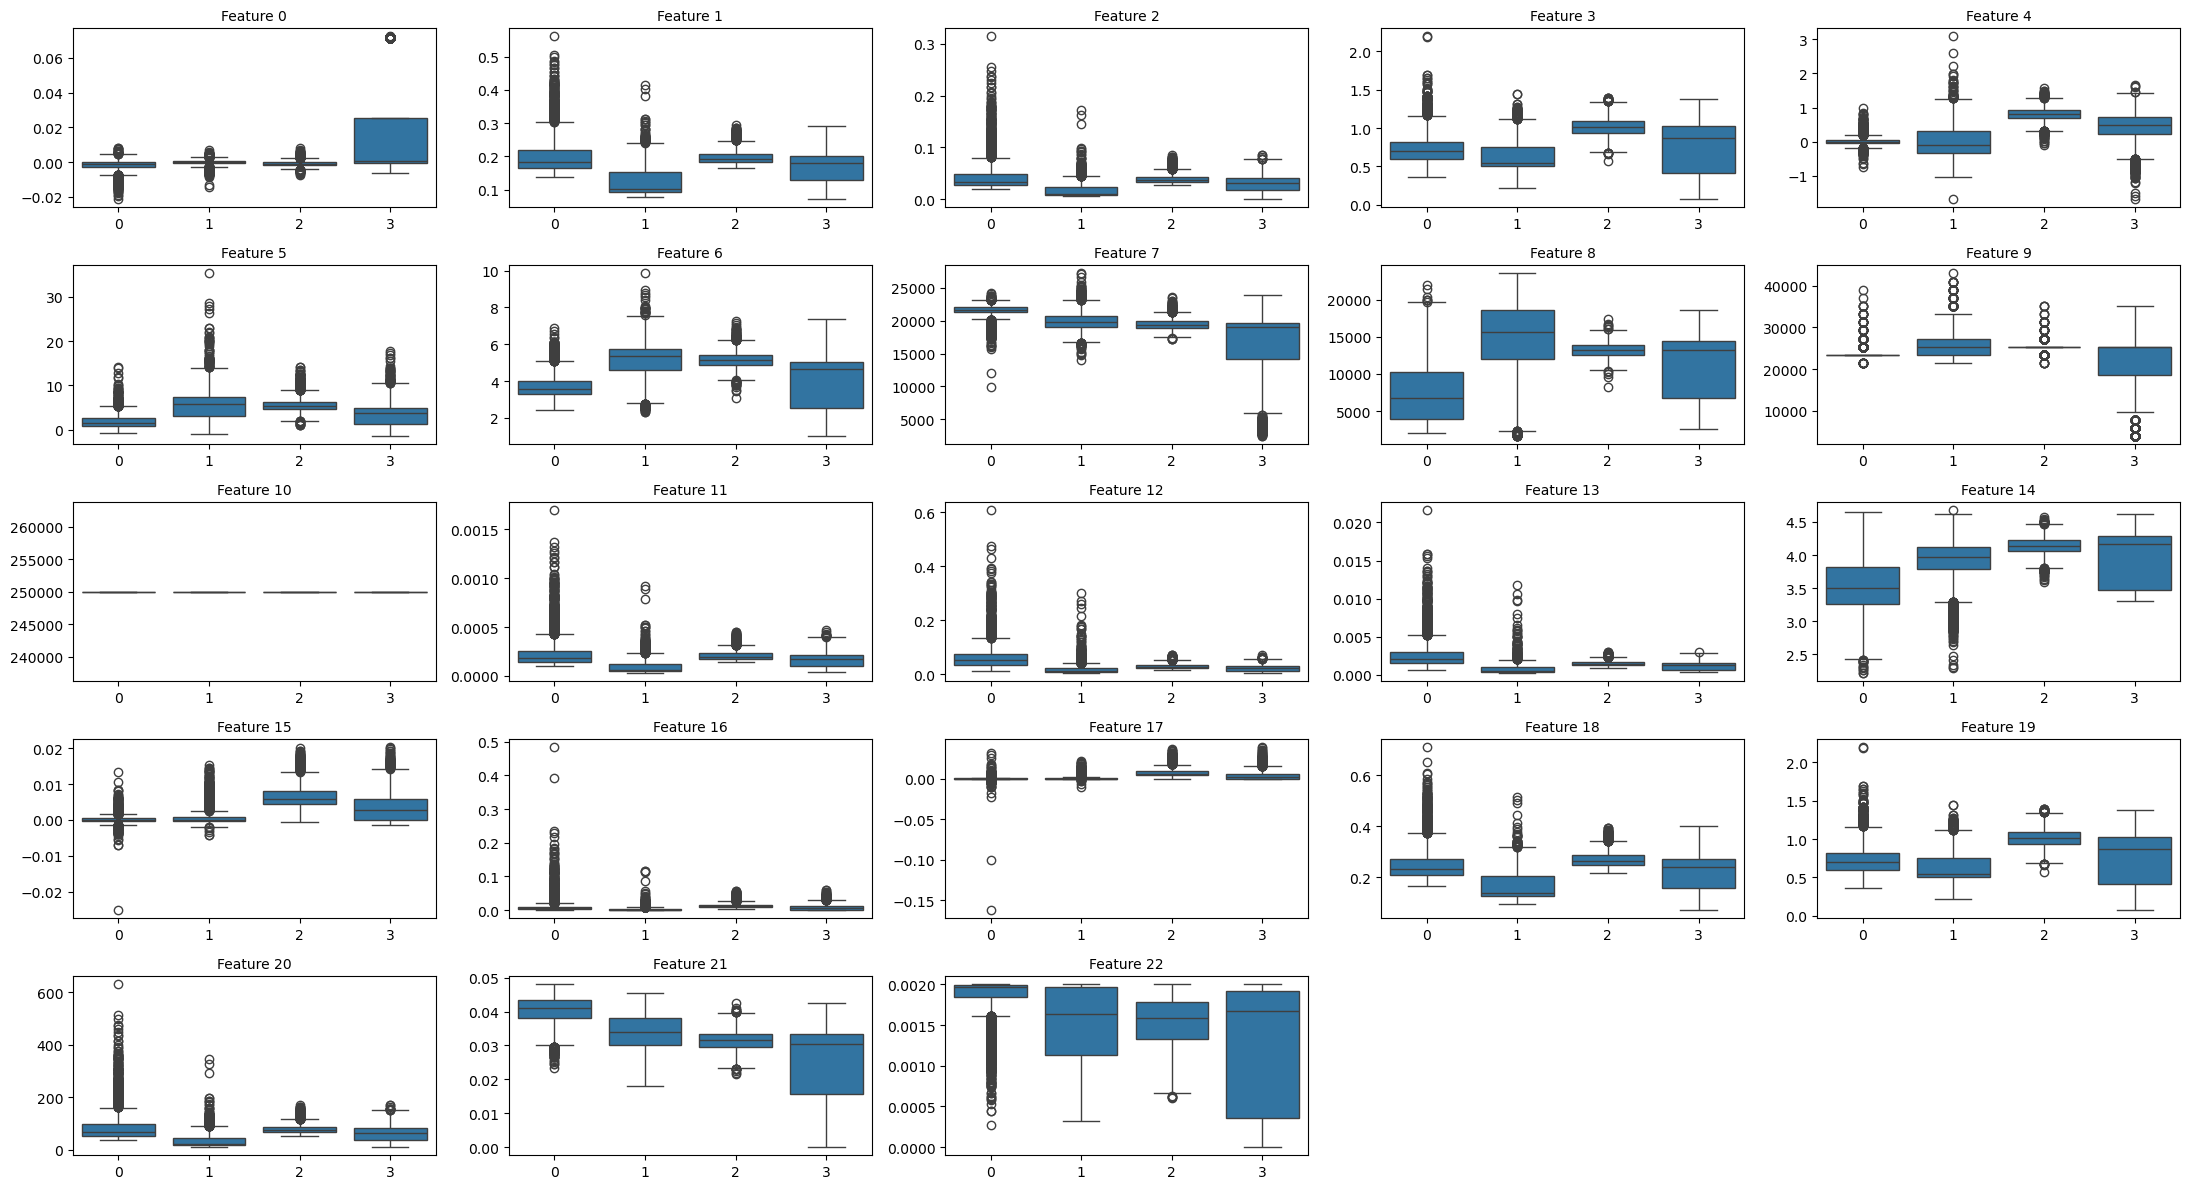

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming these are your final feature matrix and labels:
# Replace with actual variables if different
df = pd.DataFrame(full_features)
df['Label'] = full_labels  # Replace with your label variable name

plt.figure(figsize=(22, 12))
for i in range(23):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(data=df, x='Label', y=i)
    plt.title(f'Feature {i}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import shap

# Train simple model
rf = RandomForestClassifier()
rf.fit(full_features, full_labels)

# 1. Random Forest Importance
importances = rf.feature_importances_

# 2. SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(full_features)


NameError: name 'X_full' is not defined

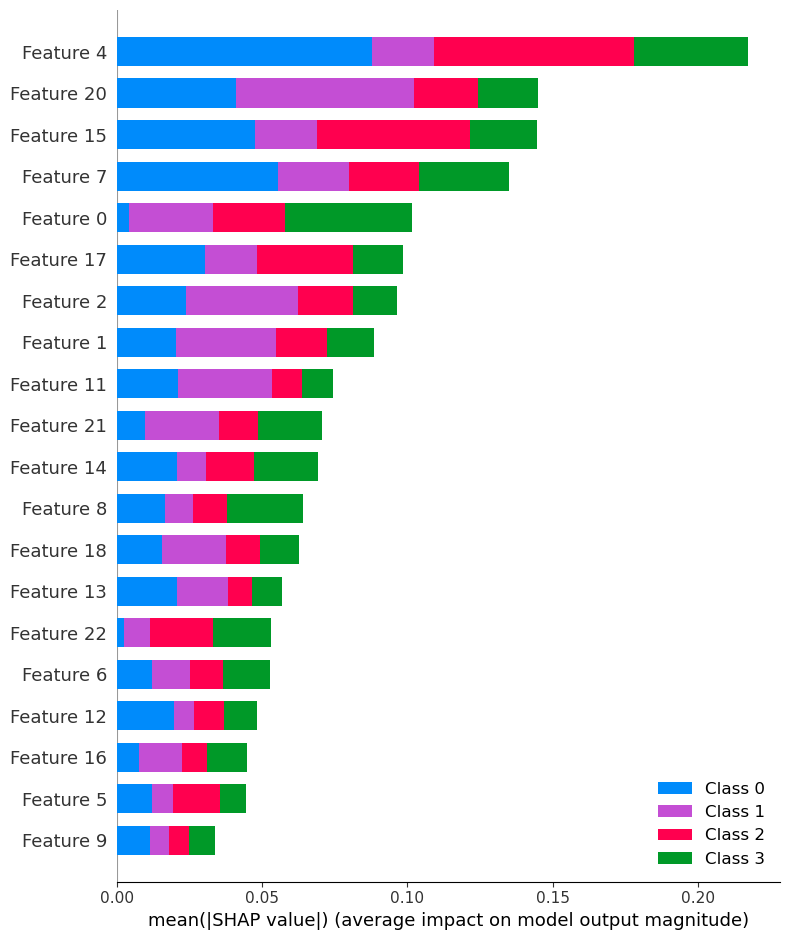

In [27]:
# 3. Top 3 features with highest global SHAP importance
shap.summary_plot(shap_values, full_features, plot_type="bar")

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Example: select top 3 features (say [5, 10, 17])
X_top3 = full_features[:, [4, 20, 15]]

X_train, X_test, y_train, y_test = train_test_split(X_top3, full_labels, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       864
           1       0.88      0.76      0.81       753
           2       0.68      0.73      0.71       812
           3       0.63      0.63      0.63       771

    accuracy                           0.77      3200
   macro avg       0.77      0.76      0.77      3200
weighted avg       0.77      0.77      0.77      3200

Accuracy: 0.76875


In [34]:
# Assuming you have X_full and y_labels
X_biomarkers = full_features[:, [4, 20, 15, 7, 0]]  # Selecting only top 3 features


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_biomarkers, full_labels, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print(classification_report(y_test, y_pred))


✅ Accuracy: 83.46875 %
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       864
           1       0.91      0.84      0.88       753
           2       0.76      0.80      0.78       812
           3       0.75      0.74      0.75       771

    accuracy                           0.83      3200
   macro avg       0.84      0.83      0.83      3200
weighted avg       0.84      0.83      0.84      3200



In [39]:
import numpy as np

# X_biomarkers: (16000, 5), columns are [Feature_4, Feature_20, Feature_15, Feature_7, Feature_0]
Feature_4 = X_biomarkers[:, 0]
Feature_20 = X_biomarkers[:, 1]
Feature_15 = X_biomarkers[:, 2]
Feature_7 = X_biomarkers[:, 3]
Feature_0 = X_biomarkers[:, 4]

# Initialize new feature matrix with original 5 features + 5 new ones
X_new = np.zeros((X_biomarkers.shape[0], 10))

# Copy original features
X_new[:, 0:5] = X_biomarkers

# Engineered Features
X_new[:, 5] = Feature_4 / (Feature_20 + 1e-5)
X_new[:, 6] = Feature_15 * Feature_7
X_new[:, 7] = Feature_20 - Feature_0
X_new[:, 8] = np.log1p(Feature_7)              # log(1 + x) to avoid log(0)
X_new[:, 9] = np.sqrt(np.abs(Feature_4))       # sqrt(abs(x)) to avoid NaN

print("✅ New feature shape:", X_new.shape)


✅ New feature shape: (16000, 10)


In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_new, full_labels, test_size=0.2, random_state=42, stratify=full_labels)

# 2. One-hot encoding of labels
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

# 3. Define MLP model
model = Sequential([
    Input(shape=(10,)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train with early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stop], verbose=1)

# 5. Evaluate
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2343 - loss: 691.6834 - val_accuracy: 0.2543 - val_loss: 54.0786
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2514 - loss: 100.5340 - val_accuracy: 0.2602 - val_loss: 17.0629
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2503 - loss: 33.5367 - val_accuracy: 0.2398 - val_loss: 6.2513
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2663 - loss: 14.9838 - val_accuracy: 0.3332 - val_loss: 1.7151
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2813 - loss: 11.0929 - val_accuracy: 0.4285 - val_loss: 1.7768
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2839 - loss: 7.7734 - val_accuracy: 0.3355 - val_loss: 4.2057
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2972 - loss: 6.8548 - val_accuracy: 0.4141 - val_loss: 2.0853
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3062 - loss: 6.1977 -

c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)


In [44]:
model = Sequential([
    Input(shape=(10,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])


In [45]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, full_labels, test_size=0.2, random_state=42, stratify=full_labels)

# One-hot encoding
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

# Define improved MLP
model = Sequential([
    Input(shape=(10,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Training
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=64, 
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

# Evaluation
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6382 - loss: 0.9087 - val_accuracy: 0.7734 - val_loss: 0.5543
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.5454 - val_accuracy: 0.7977 - val_loss: 0.5092
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.5153 - val_accuracy: 0.7996 - val_loss: 0.4833
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4855 - val_accuracy: 0.8266 - val_loss: 0.4471
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8155 - loss: 0.4619 - val_accuracy: 0.8285 - val_loss: 0.4397
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.4508 - val_accuracy: 0.8332 - val_loss: 0.4282
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.4494 - val_accuracy: 0.8250 - val_loss: 0.4353
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8251 - loss: 0.4322 - val_accu

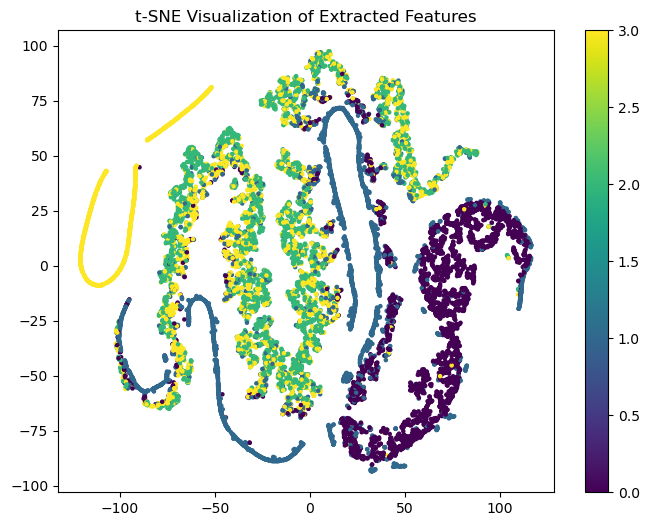

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_new)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=full_labels, cmap='viridis', s=5)
plt.title("t-SNE Visualization of Extracted Features")
plt.colorbar()
plt.show()


In [48]:
import xgboost as xgb
from sklearn.metrics import classification_report

xgb_clf = xgb.XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.05)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print("✅ Test Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))


✅ Test Accuracy: 83.875
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       800
           1       0.94      0.84      0.88       800
           2       0.75      0.85      0.80       800
           3       0.77      0.72      0.75       800

    accuracy                           0.84      3200
   macro avg       0.84      0.84      0.84      3200
weighted avg       0.84      0.84      0.84      3200



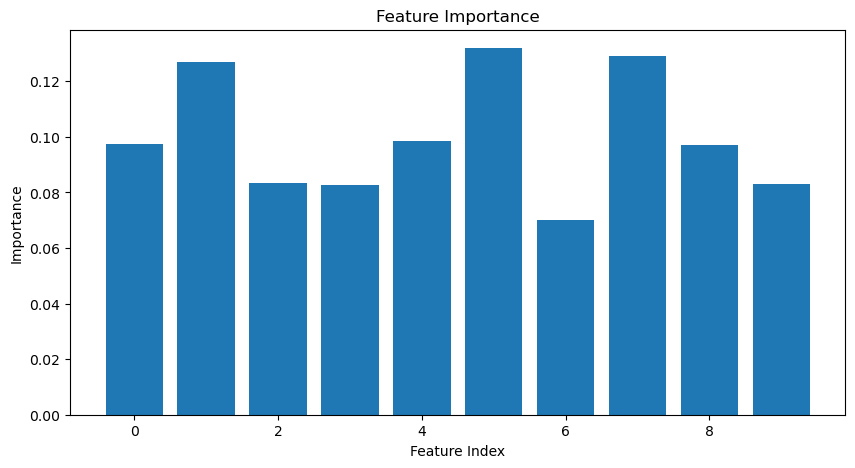

Top 5 features: [5 7 1 4 0]


In [50]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_new, full_labels)
importances = rf.feature_importances_

# Plot
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(importances)), importances)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

# Print top 5
top_idx = np.argsort(importances)[::-1][:5]
print("Top 5 features:", top_idx)


In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_sel = X_new[:, top_idx]  # Only top 3–5 biomarkers
X_train, X_test, y_train, y_test = train_test_split(X_sel, full_labels, stratify=full_labels, random_state=42, test_size=0.2)

model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"✅ Test Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred))


✅ Test Accuracy: 82.50%
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       800
           1       0.92      0.81      0.86       800
           2       0.74      0.85      0.79       800
           3       0.76      0.71      0.74       800

    accuracy                           0.82      3200
   macro avg       0.83      0.82      0.83      3200
weighted avg       0.83      0.82      0.83      3200



In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_sel.shape[1],)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)


Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3577 - loss: 9.4007 - val_accuracy: 0.6250 - val_loss: 1.1801
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5713 - loss: 1.1755 - val_accuracy: 0.6582 - val_loss: 1.0775
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6127 - loss: 1.0754 - val_accuracy: 0.6590 - val_loss: 1.0103
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6288 - loss: 0.9898 - val_accuracy: 0.5828 - val_loss: 0.9576
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6437 - loss: 0.9277 - val_accuracy: 0.6957 - val_loss: 0.8991
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6608 - loss: 0.8824 - val_accuracy: 0.6637 - val_loss: 0.9195
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6609 - loss: 0.8478 - val_accuracy: 0.6789 - val_loss: 0.8242
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6894 - loss: 0.8065 - val_accu

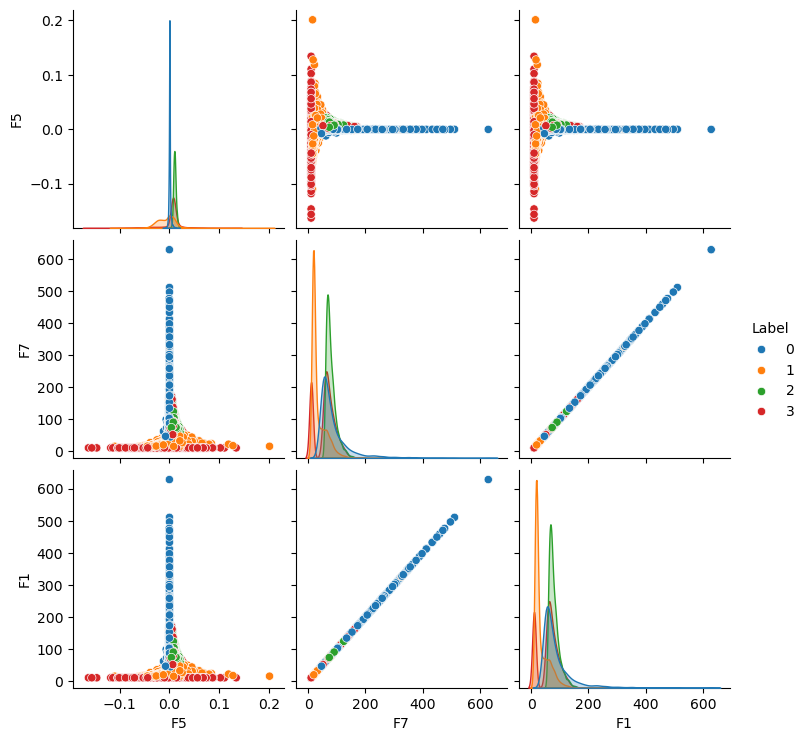

In [53]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(X_new, columns=[f"F{i}" for i in range(X_new.shape[1])])
df["Label"] = full_labels

sns.pairplot(df[[f"F{top_idx[0]}", f"F{top_idx[1]}", f"F{top_idx[2]}", "Label"]], hue="Label", palette="tab10")
plt.show()
